## This document is to test importance sampling using rejection sampling

Consider the sampling of points in our deep learning method for solving PDEs
  - We first define a bounding box that contains our domain
  - We define the domain through signed distance functions
  - We sample the domain by sampling uniformly points in the bounding box, and then rejecting points outside the domain
    + There might be a better way to do this. Right now we have to pass each point through every signed distance function

We would like to sample more points in regions of importance.
  - At each point, there is some loss that the neural network is making.
  - This loss can be used as a rating for how important the region is.
  - Based on some criteria, we can delete points which have low rating (low loss)
  - Resample uniformly the same number of deleted points 

Try to make this formal. Suppose we have a probability density function $p(x)$ (in our case it's not necessarily a density as it may not integrate to 1). Define the sequence of random variables $X_i$ in the following way: 
  - $X_0$ has a uniform distribution
  - $X_i$ is resampled uniformly if $p(X_i) < \alpha$
  - What is the long run limit of the distribution of $X_i$

Related: Metropolis-Hastings algorithm. Provided a function $f(x)$ that is proportional to the desired density
  - Sample uniformly the point $f(x)$
  - At each sample point, choose to move or not. This is done by picking a new location (typically generated by Gaussian centered at the point) and choosing an acceptance ratio. This acceptance ratio is a ratio of $f(x_{new})$ and $f(x_{old})$.

Also related: Rejection sampling. Provided a function $f(x)$ that is propotional to the desired density
  - Sample uniformly
  - Sample uniformly from 0 to the maximum of $f$ (use sample max)
  - If above value is greater than the original sample value, then resample the value.

In [1]:
## Test the above in 1 dimension
import numpy as np
import matplotlib.pyplot as plt

numpts = 1000
numsteps = 10

target = lambda x: 120*x*(1-x)*(x - 0.5)**2

## Probability density: Integrates to 1


(array([107., 103.,  92., 101.,  85., 102.,  97., 110., 101., 102.]),
 array([7.99847808e-05, 9.99417568e-02, 1.99803529e-01, 2.99665301e-01,
        3.99527073e-01, 4.99388845e-01, 5.99250617e-01, 6.99112389e-01,
        7.98974161e-01, 8.98835933e-01, 9.98697705e-01]),
 <BarContainer object of 10 artists>)

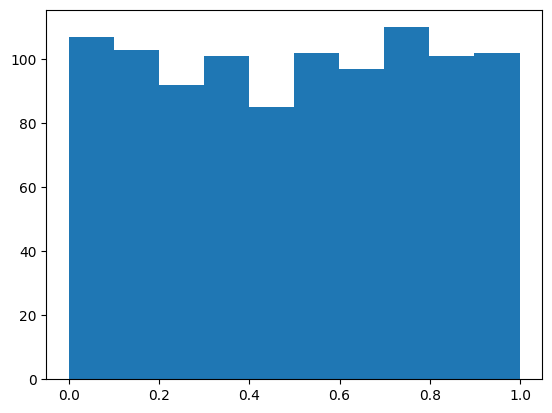

In [2]:
X = np.random.rand(numpts)
plt.hist(X)

In [3]:
for steps in range(numsteps):
    ## Evaluate the target distribution
    Y = target(X)

    ## Calculate maximum
    alpha = np.max(Y)

    ## New sample from 0 to alpha
    NewSample = np.random.rand(numpts)*alpha

    ## Find indices such that Y < alpha
    indices = Y < NewSample

    ## Resample
    X[indices] = np.random.rand(np.sum(indices))


(array([ 79., 294.,  80.,  25.,  22.,  16.,  24.,  91., 298.,  71.]),
 array([0.0098231 , 0.10855814, 0.20729317, 0.3060282 , 0.40476324,
        0.50349827, 0.6022333 , 0.70096834, 0.79970337, 0.8984384 ,
        0.99717344]),
 <BarContainer object of 10 artists>)

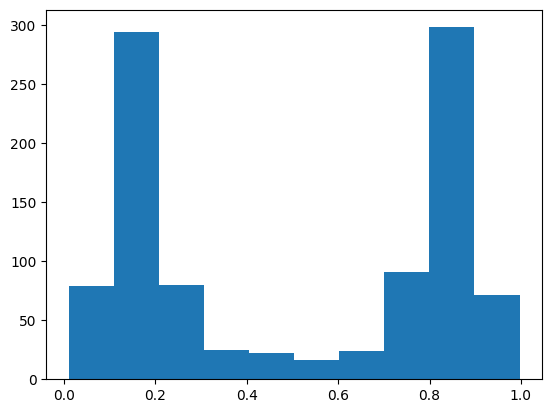

In [4]:
plt.hist(X)